**Work team By:**   
   
*   Dina Mohamed Ismail Ali (dina.mohamed.ismail62@gmail.com)
*   Eman Ramzy Ahmed (eman.ramzy.ahmed@gmail.com)




## Quantum Clustering

- determine the number of clusters
- randomly initialize the centroids
- measure distances between data points and the centroids >> Fidelity
  - Initialize three separable states in the ground state. One is for the data point and the other two represent the centroid.
  - choose your encoding scheme
  - using a for loop you will pick a classical point to measure the distance between the centroids and this sample.
  - encode the data using the encoding scheme (rotational gates)
  - apply the selected rotational gates on the states
  - then calculate the fidelity between the two states (one state would represent the data point and the other would represent the centroid

- assign data points to the nearest centroid
- update the position of the centroid according to the mean of each cluster

## Task!

Implement a quantum clustering algorithm using the above steps to cluster a dataset of your own choice.

- I would prefer two clusters only but do as you wish.
- Use Numpy only.
- Before each cell I want a small description of what is happening.
- Write your code in functions.
- Each function should execute one operation only.
- Annotate your code and document it.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.visualization import array_to_latex
from qiskit.circuit.library import XGate, ZGate, YGate, HGate, RXGate, RYGate

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

**Step 1:** determine the number of clusters

In [2]:
no_clusters = 2

**Step 2:** randomly initialize the centroids

In [3]:
def init_centroids(data: np.ndarray, k: int) -> np.ndarray:
    """
    Initialize centroids for clustering.

    Args:
        data (numpy.ndarray): Input data points.
        k (int): Number of clusters.

    Returns:
        numpy.ndarray: Centroids.
    """

    centroids_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_indices]
    return centroids


**Step 3:** calculate fidelity

In [4]:
def calculate_fidelity(data_point: np.ndarray, centroid: np.ndarray) -> float:
    """
    Calculate fidelity between a data point and a centroid.

    Args:
        data_point (numpy.ndarray): Data point.
        centroid (numpy.ndarray): Centroid.

    Returns:
        float: Fidelity.
    """
    fidelity = np.dot(data_point.conj().T, centroid)
    return fidelity

**Step 4:** initialize ground state

In [5]:
def init_state() -> np.ndarray:
    """
    Initialize quantum state.

    Returns:
        numpy.ndarray: Quantum state.
    """
    zero_vector = np.array([[1], [0]])
    return zero_vector


**Step 5:** encode data

In [6]:
def encode_data(state: np.ndarray, data: float) -> np.ndarray:
    """
    Encode data using quantum gates.

    Args:
        state (numpy.ndarray): Initial quantum state.
        data (float): Data point or centroid.

    Returns:
        numpy.ndarray: Encoded state.
    """

    state = init_state()
    ry = RYGate(float(data)).to_matrix()
    evolved_state = ry @ state

    return evolved_state

**Step 6:** assign data points to the nearest centroid

In [7]:
def find_closest_centoids(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Assign data points to the nearest centroid.

    Args:
        data (numpy.ndarray): Input data points.
        centroids (numpy.ndarray): Centroids.

    Returns:
        numpy.ndarray: Cluster labels.
    """

    cluster_labels = np.zeros(data.shape[0])
    for i, data_point in enumerate(data):
        # Encode data points and centroids, calculate fidelity
        fidelity_to_centroids = [calculate_fidelity(encode_data(init_state(), data_point), encode_data(init_state(), centroid)) for centroid in centroids]

        # Assign the data point to the nearest centroid
        cluster_labels[i] = np.argmax(fidelity_to_centroids)

    return cluster_labels

**Step 8:** update the position of the centroid according to the mean of each cluster

In [8]:
def update_centroids(data: np.ndarray, k: int, centroids: np.ndarray, cluster_labels: np.ndarray) -> tuple:
    """
    Update centroids until convergence.

    Args:
        data (numpy.ndarray): Input data points.
        k (int): Number of clusters.
        centroids (numpy.ndarray): Initial centroids.
        cluster_labels (numpy.ndarray): Cluster labels.

    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: Updated cluster labels and centroids.
    """

    prev_centroids = None
    while not np.array_equal(centroids, prev_centroids):
        prev_centroids = centroids

        # Update centroids according to the mean of each cluster
        for i in range(k):
            cluster_points = data[cluster_labels == i]
            centroids[i] = np.mean(cluster_points, axis=0)

        # Re-assign data points to the nearest centroid
        cluster_labels = np.zeros(data.shape[0])
        for i, data_point in enumerate(data):
            fidelity_to_centroids = [calculate_fidelity(encode_data(init_state(), data_point), encode_data(init_state(), centroid)) for centroid in centroids]
            cluster_labels[i] = np.argmax(fidelity_to_centroids)

    return cluster_labels, centroids

**Step 9:** Quantum Clustering

In [9]:
def quantum_clustering(data: np.ndarray, k: int = 2) -> tuple:
    """
    Perform quantum clustering.

    Args:
        data (numpy.ndarray): Input data points.
        k (int): Number of clusters.

    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: Cluster labels and centroids.
    """
    # Step 1: Initialize centroids randomly
    centroids = init_centroids(data, k)

    # Step 2: Assign data points to the nearest centroid
    cluster_labels = find_closest_centoids(data, centroids)

    # Step 3: Update centroids until convergence
    cluster_labels, centroids = update_centroids(data, k, centroids, cluster_labels)

    return cluster_labels, centroids

**Step 10:** predict function

In [10]:
def predict(new_data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Predict cluster labels for new data.

    Args:
        new_data (numpy.ndarray): New data points.
        centroids (numpy.ndarray): Cluster centroids.

    Returns:
        numpy.ndarray: Predicted cluster labels for new data.
    """

    cluster_labels = np.zeros(new_data.shape[0])
    for i, data_point in enumerate(new_data):
        # Calculate fidelity to centroids
        fidelity_to_centroids = [calculate_fidelity(encode_data(init_state(), data_point), encode_data(init_state(), centroid)) for centroid in centroids]
        # Assign the data point to the nearest centroid
        cluster_labels[i] = np.argmax(fidelity_to_centroids)

    return cluster_labels

## generate data

In [46]:
def generate_data(num_of_samples: int) -> np.ndarray:
    """
    Generate synthetic data for training.

    Args:
        num_of_samples (int): Number of samples.

    Returns:
        numpy.ndarray: Synthetic data.
    """

    x1 = np.random.normal(2, 0.1, num_of_samples)
    y1 = np.ones(len(x1))

    x2 = np.random.normal(-2, 0.1, num_of_samples)
    y2 = np.zeros(len(x2))

    data_with_labels = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T

    return data_with_labels

In [47]:
data = generate_data(100)

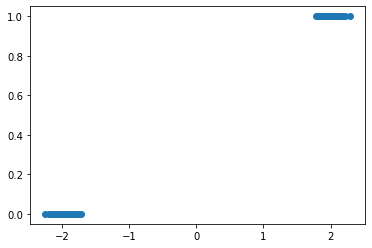

In [48]:
plt.scatter(data[:,0], data[:,1]);

In [49]:
feature = data[:, 0]

In [45]:
cluster_labels, centroids = quantum_clustering(feature, no_clusters)

In [16]:
print(cluster_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
print(centroids)

[-2.00622462  2.00381039]


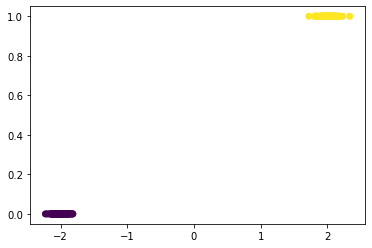

In [18]:
plt.scatter(feature, cluster_labels, c=cluster_labels)

In [19]:
data_point = np.array([2])
cluster_label = predict(data_point, centroids)

print(cluster_label)

[1.]


In [20]:
data_point = np.array([.001])
cluster_label = predict(data_point, centroids)

print(cluster_label)

[1.]


In [21]:
data_point = np.array([-3])
cluster_label = predict(data_point, centroids)

print(cluster_label)

[0.]


#### Another data

In [22]:
feature2 = np.random.randint(5, 100, size=200)

In [23]:
cluster_labels, centroids = quantum_clustering(feature2, no_clusters)

In [24]:
print(cluster_labels)

[0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1.]


In [25]:
print(centroids)

[47 50]


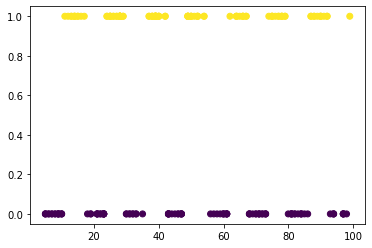

In [26]:
plt.scatter(feature2, cluster_labels, c=cluster_labels)

In [27]:
data_point = np.array([100])
cluster_label = predict(data_point, centroids)

print(cluster_label)

[1.]


In [28]:
data_point = np.array([90])
cluster_label = predict(data_point, centroids)

print(cluster_label)

[1.]


## K-mean 

In [50]:
class K_means:
    def __init__(self, k=2):
        self.k = k
        self.centroids = None
        self.fidelity = None
        self.zero_vector = None
        self.cluster_labels = np.zeros(data.shape[0])
        
    def init_centroids(self, data: np.ndarray) -> np.ndarray:
        """
        Initialize centroids for clustering.

        Args:
            data (numpy.ndarray): Input data points.
            k (int): Number of clusters.

        Returns:
            numpy.ndarray: Centroids.
        """

        centroids_indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = data[centroids_indices]
        return self.centroids
    
    def calculate_fidelity(self, data_point: np.ndarray, centroid: np.ndarray) -> float:
        """
        Calculate fidelity between a data point and a centroid.

        Args:
            data_point (numpy.ndarray): Data point.
            centroid (numpy.ndarray): Centroid.

        Returns:
            float: Fidelity.
        """
        self.fidelity = np.dot(data_point.conj().T, centroid)
        return self.fidelity
    
    def init_state(self) -> np.ndarray:
        """
        Initialize quantum state.

        Returns:
            numpy.ndarray: Quantum state.
        """
        self.zero_vector = np.array([[1], [0]])
        return self.zero_vector
    
    def encode_data(self, state: np.ndarray, data: float) -> np.ndarray:
        """
        Encode data using quantum gates.

        Args:
            state (numpy.ndarray): Initial quantum state.
            data (float): Data point or centroid.

        Returns:
            numpy.ndarray: Encoded state.
        """

        state = self.init_state()
        ry = RYGate(float(data)).to_matrix()
        evolved_state = ry @ state

        return evolved_state
    
    def find_closest_centoids(self, data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Assign data points to the nearest centroid.

        Args:
            data (numpy.ndarray): Input data points.
            centroids (numpy.ndarray): Centroids.

        Returns:
            numpy.ndarray: Cluster labels.
        """

        for i, data_point in enumerate(data):
            # Encode data points and centroids, calculate fidelity
            fidelity_to_centroids = [self.calculate_fidelity(self.encode_data(self.init_state(), data_point), self.encode_data(self.init_state(), centroid)) for centroid in centroids]

            # Assign the data point to the nearest centroid
            self.cluster_labels[i] = np.argmax(fidelity_to_centroids)

        return self.cluster_labels
    
    def update_centroids(self, data: np.ndarray, k: int, centroids: np.ndarray, cluster_labels: np.ndarray) -> tuple:
        """
        Update centroids until convergence.

        Args:
            data (numpy.ndarray): Input data points.
            k (int): Number of clusters.
            centroids (numpy.ndarray): Initial centroids.
            cluster_labels (numpy.ndarray): Cluster labels.

        Returns:
            Tuple[numpy.ndarray, numpy.ndarray]: Updated cluster labels and centroids.
        """

        prev_centroids = None
        while not np.array_equal(centroids, prev_centroids):
            prev_centroids = centroids

            # Update centroids according to the mean of each cluster
            for i in range(k):
                cluster_points = data[cluster_labels == i]
                centroids[i] = np.mean(cluster_points, axis=0)

            # Re-assign data points to the nearest centroid
            cluster_labels = np.zeros(data.shape[0])
            for i, data_point in enumerate(data):
                fidelity_to_centroids = [self.calculate_fidelity(self.encode_data(self.init_state(), data_point), self.encode_data(self.init_state(), centroid)) for centroid in centroids]
                cluster_labels[i] = np.argmax(fidelity_to_centroids)

        return self.cluster_labels, self.centroids
    
        
    def fit(self, X, y=None):
        """
        Perform quantum clustering.

        Args:
            data (numpy.ndarray): Input data points.
            k (int): Number of clusters.

        Returns:
            Tuple[numpy.ndarray, numpy.ndarray]: Cluster labels and centroids.
        """
        # Step 1: Initialize centroids randomly
        centroids = self.init_centroids(X)

        # Step 2: Assign data points to the nearest centroid
        self.cluster_labels = self.find_closest_centoids(X, self.centroids)

        # Step 3: Update centroids until convergence
        self.cluster_labels, self.centroids = self.update_centroids(X, self.k, self.centroids, self.cluster_labels)

        return self.cluster_labels, self.centroids
    
    def predict(self, new_data: np.ndarray) -> np.ndarray:
        """
        Predict cluster labels for new data.

        Args:
            new_data (numpy.ndarray): New data points.
            centroids (numpy.ndarray): Cluster centroids.

        Returns:
            numpy.ndarray: Predicted cluster labels for new data.
        """

        cluster_labels = np.zeros(new_data.shape[0])
        for i, data_point in enumerate(new_data):
            # Calculate fidelity to centroids
            fidelity_to_centroids = [self.calculate_fidelity(self.encode_data(self.init_state(), data_point), self.encode_data(self.init_state(), centroid)) for centroid in self.centroids]
            # Assign the data point to the nearest centroid
            cluster_labels[i] = np.argmax(fidelity_to_centroids)

        return cluster_labels

In [51]:
kmeans = K_means()

In [52]:
cluster_labels, centroids = kmeans.fit(feature)

In [53]:
print(cluster_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [54]:
print(centroids)

[ 2.02490602 -1.99905962]


In [55]:
data_point = np.array([100])
cluster_label = kmeans.predict(data_point)

print(cluster_label)

[1.]


In [56]:
data_point = np.array([90])
cluster_label = kmeans.predict(data_point)

print(cluster_label)

[0.]


## Pipeline

In [57]:
pipeline = Pipeline([
    ('kmeans', kmeans)
])

In [58]:
pipeline.fit(feature)

Pipeline(steps=[('kmeans', <__main__.K_means object at 0x000001E87309E6A0>)])

**Predict**

In [59]:
data_point = np.array([100])
cluster_label = pipeline.predict(data_point)

print("Cluster label", cluster_label)

Cluster label [0.]
